In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.feature_selection import mutual_info_classif, chi2, f_classif, SelectKBest

In [2]:
# Load the dataset 
data = pd.read_csv('Space_data1.csv')


In [3]:
# Check for missing values
print(data.isnull().sum())

EPOCH                  0
MEAN_MOTION            0
ECCENTRICITY           0
INCLINATION            0
RA_OF_ASC_NODE         0
ARG_OF_PERICENTER      0
MEAN_ANOMALY           0
BSTAR                  0
MEAN_MOTION_DOT        0
MEAN_MOTION_DDOT       0
SEMIMAJOR_AXIS         0
PERIOD                 0
APOAPSIS               0
PERIAPSIS              0
OBJECT_TYPE            0
RCS_SIZE             159
COUNTRY_CODE           0
LAUNCH_DATE            0
SITE                   0
FILE                   0
dtype: int64


In [4]:
data["RCS_SIZE"]= data["RCS_SIZE"].fillna("Unknown")
print(data.isnull().sum())

EPOCH                0
MEAN_MOTION          0
ECCENTRICITY         0
INCLINATION          0
RA_OF_ASC_NODE       0
ARG_OF_PERICENTER    0
MEAN_ANOMALY         0
BSTAR                0
MEAN_MOTION_DOT      0
MEAN_MOTION_DDOT     0
SEMIMAJOR_AXIS       0
PERIOD               0
APOAPSIS             0
PERIAPSIS            0
OBJECT_TYPE          0
RCS_SIZE             0
COUNTRY_CODE         0
LAUNCH_DATE          0
SITE                 0
FILE                 0
dtype: int64


In [6]:
# Count occurrences of each object type
object_type_counts = data['OBJECT_TYPE'].value_counts()

# Display the count of "TBA" object type
tba_count = object_type_counts.get('TBA', 0)
print(f"Count of 'TBA' object type: {tba_count}")

# Display the count of "TBA" object type
debris_count = object_type_counts.get('DEBRIS', 0)
print(f"Count of 'debris' object type: {debris_count}")

# Display the count of "TBA" object type
payload_count = object_type_counts.get('PAYLOAD', 0)
print(f"Count of 'payload' object type: {payload_count}")

# Display the count of "TBA" object type
rocket_count = object_type_counts.get('ROCKET BODY', 0)
print(f"Count of 'rocket body' object type: {rocket_count}")

Count of 'TBA' object type: 208
Count of 'debris' object type: 8431
Count of 'payload' object type: 4950
Count of 'rocket body' object type: 744


In [7]:
# Remove rows where OBJECT_TYPE is 'TBA'
data = data[data['OBJECT_TYPE'] != 'TBA']

# Check the updated DataFrame to ensure rows are removed
print(data['OBJECT_TYPE'])

0         DEBRIS
1         DEBRIS
2        PAYLOAD
3         DEBRIS
4         DEBRIS
          ...   
14328     DEBRIS
14329     DEBRIS
14330     DEBRIS
14331     DEBRIS
14332    PAYLOAD
Name: OBJECT_TYPE, Length: 14125, dtype: object


In [8]:
# lebel encoders
label_encoders = {}
categorical_columns = ['OBJECT_TYPE', 'RCS_SIZE', 'COUNTRY_CODE', 'SITE', 'FILE']

# Iterate over the categorical columns and apply LabelEncoder
for column in categorical_columns:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le


In [9]:
# Initialize StandardScaler
scaler = StandardScaler()

# Select the numerical columns to scale (excluding categorical columns)
numerical_columns = ['MEAN_MOTION', 'ECCENTRICITY', 'INCLINATION', 'RA_OF_ASC_NODE', 'ARG_OF_PERICENTER', 
                     'MEAN_ANOMALY', 'BSTAR', 'MEAN_MOTION_DOT', 'MEAN_MOTION_DDOT', 'SEMIMAJOR_AXIS', 
                     'PERIOD', 'APOAPSIS', 'PERIAPSIS']

# Apply scaling
data[numerical_columns] = scaler.fit_transform(data[numerical_columns])

# Verify the scaling by checking the first few rows of the scaled numerical columns
print(data[numerical_columns].head())


   MEAN_MOTION  ECCENTRICITY  INCLINATION  RA_OF_ASC_NODE  ARG_OF_PERICENTER  \
0    -2.095417      3.199124    -2.234127       -0.799255           0.740394   
1     0.293593     -0.356006     0.295740        0.993266          -0.065531   
2    -2.510771     -0.242940    -2.084223       -1.431781           0.807415   
3     0.518734     -0.339649     0.819142       -1.498860          -1.228612   
4     0.507394     -0.338753     0.817295       -0.526079           1.716921   

   MEAN_ANOMALY     BSTAR  MEAN_MOTION_DOT  MEAN_MOTION_DDOT  SEMIMAJOR_AXIS  \
0     -1.384968  0.767049        -0.016098         -0.013596        1.033211   
1      0.093312  0.020344        -0.019435         -0.013596       -0.346054   
2     -0.407260  0.018316        -0.020448         -0.013596        3.160484   
3      1.201239  0.028027        -0.010363         -0.013596       -0.381592   
4     -1.486581  0.030866        -0.008931         -0.013596       -0.379900   

     PERIOD  APOAPSIS  PERIAPSIS  
0  

In [10]:
# Convert 'EPOCH' and 'LAUNCH_DATE' to Unix timestamps (if they're still in datetime format)
data['EPOCH'] = pd.to_datetime(data['EPOCH'])
data['LAUNCH_DATE'] = pd.to_datetime(data['LAUNCH_DATE'], format='%Y')

# Convert to Unix timestamps (seconds since 1970)
data['EPOCH_TIMESTAMP'] = data['EPOCH'].astype('int64') // 10**9
data['LAUNCH_DATE_TIMESTAMP'] = data['LAUNCH_DATE'].astype('int64') // 10**9

# Now drop the original datetime columns
data = data.drop(columns=['EPOCH', 'LAUNCH_DATE'])

# Verify the transformation
print(data[[ 'EPOCH_TIMESTAMP', 'LAUNCH_DATE_TIMESTAMP']].head())


   EPOCH_TIMESTAMP  LAUNCH_DATE_TIMESTAMP
0       1635720410              694224000
1       1635697937              283996800
2       1635744163              978307200
3       1635678684              915148800
4       1635702406              915148800


In [11]:
# Set 'OBJECT_TYPE' as the target variable and drop it from the feature set
X = data.drop(columns=['OBJECT_TYPE'])  # Features
y = data['OBJECT_TYPE']  # Target variable

# Calculate Mutual Information (Information Gain) for the features
mutual_info = mutual_info_classif(X, y)
mi_scores = pd.Series(mutual_info, index=X.columns).sort_values(ascending=False)

# Display top 10 features based on mutual information
print("Top 10 features based on Information Gain:")
print(mi_scores.head(10))


Top 10 features based on Information Gain:
INCLINATION              0.514100
LAUNCH_DATE_TIMESTAMP    0.496220
MEAN_MOTION              0.481359
SEMIMAJOR_AXIS           0.481315
PERIOD                   0.481093
APOAPSIS                 0.456526
PERIAPSIS                0.400029
ECCENTRICITY             0.395581
RCS_SIZE                 0.359407
SITE                     0.269869
dtype: float64


In [12]:
chi2_scores, p_values = chi2(X.abs(), y)  # Taking absolute to ensure no negative values
chi2_scores_series = pd.Series(chi2_scores, index=X.columns).sort_values(ascending=False)

# Display top 10 features based on Chi-square scores
print("Top 10 features based on Chi-square scores:")
print(chi2_scores_series.head(10))

Top 10 features based on Chi-square scores:
LAUNCH_DATE_TIMESTAMP    1.243062e+12
FILE                     2.629937e+05
COUNTRY_CODE             2.286236e+04
EPOCH_TIMESTAMP          1.453638e+04
SITE                     6.377215e+03
RCS_SIZE                 5.362399e+03
ECCENTRICITY             1.883629e+03
PERIAPSIS                1.578087e+03
MEAN_MOTION              1.095325e+03
SEMIMAJOR_AXIS           8.981895e+02
dtype: float64


In [13]:
# Apply the F-test (ANOVA) on the features
f_scores, p_values = f_classif(X, y)
f_scores_series = pd.Series(f_scores, index=X.columns).sort_values(ascending=False)

# Display top 10 features based on F-test scores
print("Top 10 features based on F-test scores:")
print(f_scores_series.head(10))

Top 10 features based on F-test scores:
RCS_SIZE                 10671.128323
LAUNCH_DATE_TIMESTAMP     8362.696842
FILE                      1509.913031
ECCENTRICITY              1213.980399
INCLINATION               1130.679053
COUNTRY_CODE               835.820459
MEAN_MOTION                749.153980
APOAPSIS                   616.024339
SITE                       556.235002
SEMIMAJOR_AXIS             512.402073
dtype: float64


In [14]:
# Compare selected features
# Get the top 10 features for each method
top_features_mi = mi_scores.head(10).index
top_features_chi2 = chi2_scores_series.head(10).index
top_features_f_test = f_scores_series.head(10).index
print("\nSelected Features Comparison:")
print("Mutual Information Top Features:", list(top_features_mi))
print("Chi-Square Top Features:", list(top_features_chi2))
print("F-Test Top Features:", list(top_features_f_test))


Selected Features Comparison:
Mutual Information Top Features: ['INCLINATION', 'LAUNCH_DATE_TIMESTAMP', 'MEAN_MOTION', 'SEMIMAJOR_AXIS', 'PERIOD', 'APOAPSIS', 'PERIAPSIS', 'ECCENTRICITY', 'RCS_SIZE', 'SITE']
Chi-Square Top Features: ['LAUNCH_DATE_TIMESTAMP', 'FILE', 'COUNTRY_CODE', 'EPOCH_TIMESTAMP', 'SITE', 'RCS_SIZE', 'ECCENTRICITY', 'PERIAPSIS', 'MEAN_MOTION', 'SEMIMAJOR_AXIS']
F-Test Top Features: ['RCS_SIZE', 'LAUNCH_DATE_TIMESTAMP', 'FILE', 'ECCENTRICITY', 'INCLINATION', 'COUNTRY_CODE', 'MEAN_MOTION', 'APOAPSIS', 'SITE', 'SEMIMAJOR_AXIS']


In [19]:
# Feature selection methods
selection_methods = {
    'Mutual Information': top_features_mi,
    'Chi-Square': top_features_chi2,
    'F-Test': top_features_f_test
}

# Define a mapping from numeric labels to class names
label_mapping = {0: 'DEBRIS', 1: 'PAYLOAD', 2: 'ROCKET BODY'}

# Function to apply class balancing techniques
def apply_class_balancing(X, y, technique):
    if technique == 'Random Oversampling':
        ros = RandomOverSampler(random_state=42)
        return ros.fit_resample(X, y)
    elif technique == 'Random Undersampling':
        rus = RandomUnderSampler(random_state=42)
        return rus.fit_resample(X, y)
    elif technique == 'SMOTE':
        smote = SMOTE(random_state=42)
        return smote.fit_resample(X, y)
    else:
        raise ValueError("Unknown technique")

# Apply each balancing technique
techniques = ['Random Oversampling', 'Random Undersampling', 'SMOTE']
balanced_data = {}

for technique in techniques:
    X_bal, y_bal = apply_class_balancing(X, y, technique)
    balanced_data[technique] = (X_bal, y_bal)
    
    # Convert numeric labels to class names
    y_bal_named = pd.Series(y_bal).map(label_mapping)
    
    # Print class distribution after balancing
    class_distribution = y_bal_named.value_counts().to_frame().rename(columns={0: 'Count'})
    print(f"\nClass distribution after {technique}:")
    print(class_distribution)



Class distribution after Random Oversampling:
             count
OBJECT_TYPE       
DEBRIS        8431
PAYLOAD       8431
ROCKET BODY   8431

Class distribution after Random Undersampling:
             count
OBJECT_TYPE       
DEBRIS         744
PAYLOAD        744
ROCKET BODY    744

Class distribution after SMOTE:
             count
OBJECT_TYPE       
DEBRIS        8431
PAYLOAD       8431
ROCKET BODY   8431


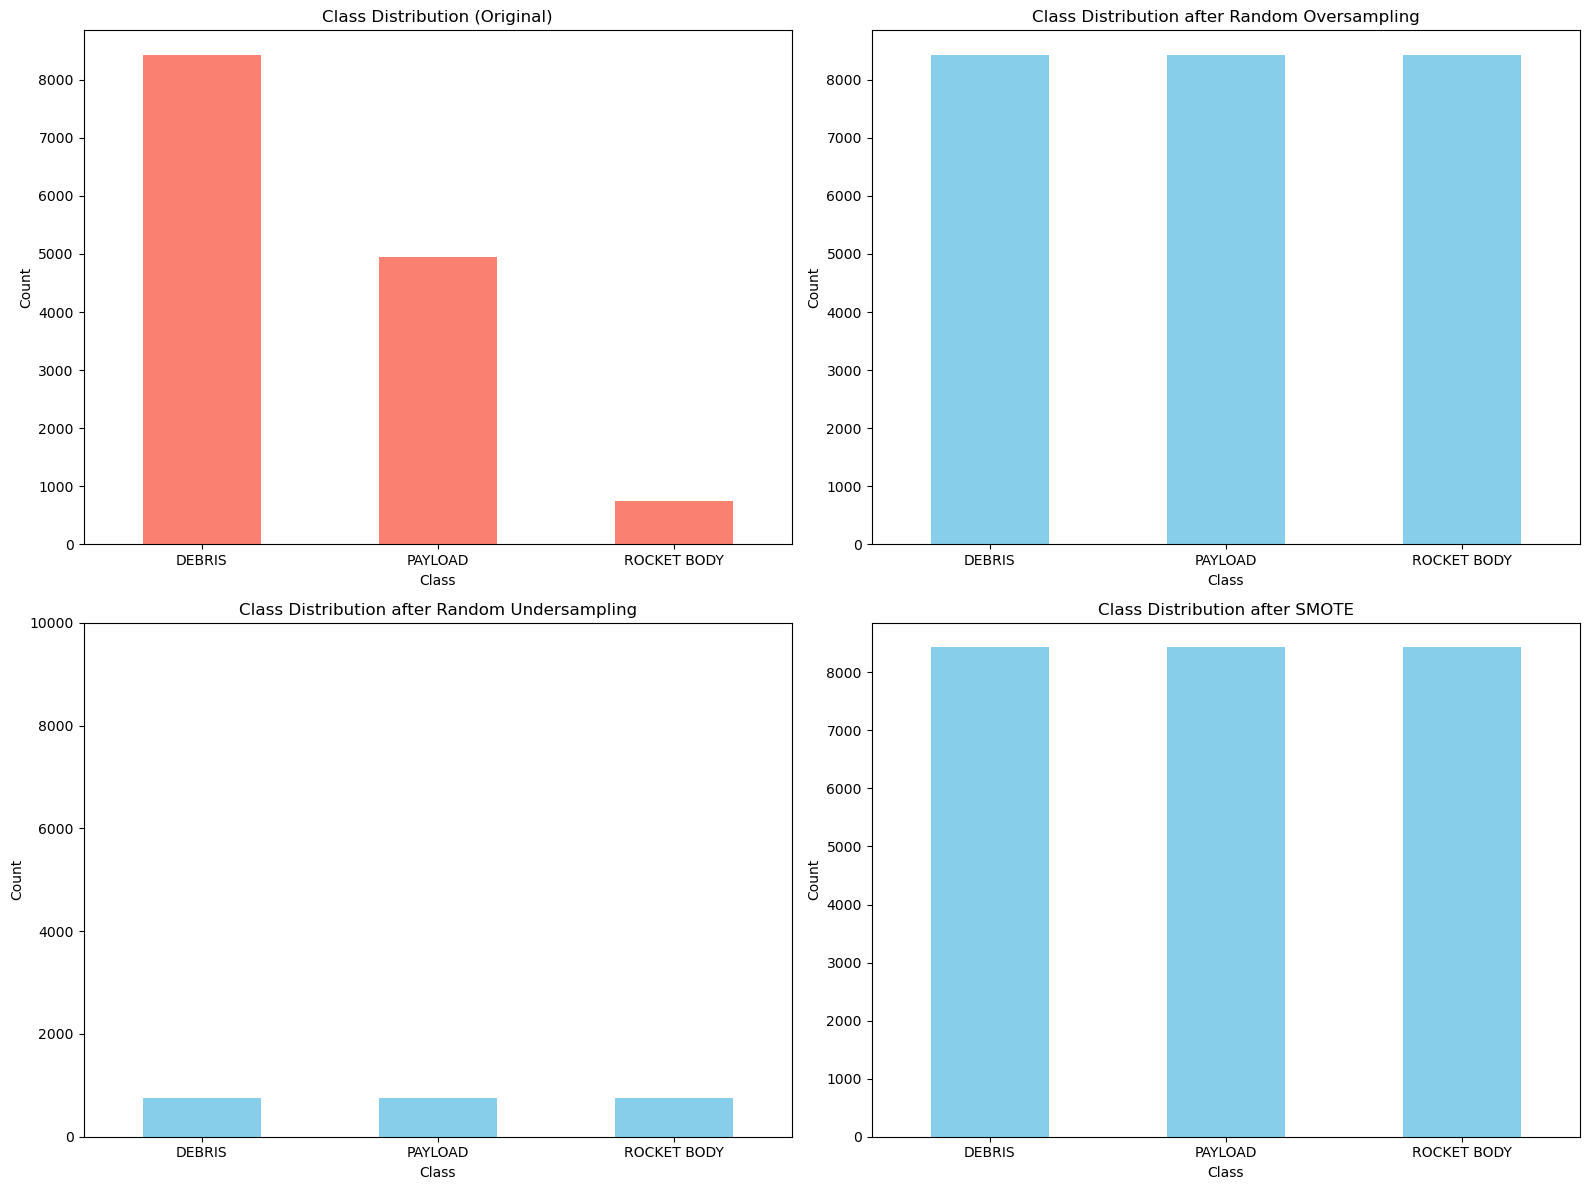

In [32]:
import matplotlib.pyplot as plt
import pandas as pd

# Define a mapping from numeric labels to class names
label_mapping = {0: 'DEBRIS', 1: 'PAYLOAD', 2: 'ROCKET BODY'}

# Convert numeric labels to class names
def map_labels(y):
    return pd.Series(y).map(label_mapping)

# Plotting function
def plot_class_distribution(X, y, balanced_data, filename='class_distribution.png'):
    plt.figure(figsize=(16, 12))
    
    # Plotting the original class distribution
    plt.subplot(2, 2, 1)
    original_counts = map_labels(y).value_counts()
    original_counts.plot(kind='bar', color='salmon')
    plt.title('Class Distribution (Original)')
    plt.xlabel('Class')
    plt.ylabel('Count')
    plt.xticks(rotation=0)
    
    # Plotting class distributions after each balancing technique
    techniques = list(balanced_data.keys())
    
    for i, (technique, (X_bal, y_bal)) in enumerate(balanced_data.items(), start=2):
        plt.subplot(2, 2, i)
        balanced_counts = map_labels(y_bal).value_counts()
        balanced_counts.plot(kind='bar', color='skyblue')
        
        # Optionally set y-axis limit for specific techniques
        if technique == 'Random Undersampling':
            plt.ylim(0, 10000)  # Set y-axis limit to 60,000
            
        plt.title(f'Class Distribution after {technique}')
        plt.xlabel('Class')
        plt.ylabel('Count')
        plt.xticks(rotation=0)
    
    plt.tight_layout()
    plt.savefig(filename)
    plt.show()

# Call the plotting function with the original and balanced data
plot_class_distribution(X, y, balanced_data)


In [33]:
# Define a function to train and evaluate models
def train_and_evaluate(X_train, y_train, X_test, y_test):
    models = {
        'KNN': KNeighborsClassifier(),
        'Decision Tree': DecisionTreeClassifier(),
        'Random Forest': RandomForestClassifier(),
        'SVM': SVC()
    }
    
    results = {}
    
    for name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        report = classification_report(y_test, y_pred, output_dict=True)
        results[name] = report
    
    return results


In [ ]:
# Evaluate models for each feature selection method and class balancing technique
for selection_name, selected_features in selection_methods.items():
    X_selected = X[selected_features]
    
    print(f"\nFeature selection using {selection_name}")
    
    for technique in techniques:
        X_bal, y_bal = balanced_data[technique]
        
        # Split data
        X_train, X_test, y_train, y_test = train_test_split(X_bal, y_bal, test_size=0.3, random_state=42)
        
        # Train and evaluate models
        results = train_and_evaluate(X_train, y_train, X_test, y_test)
        
        print(f"\nResults for {technique}:")
        for model_name, report in results.items():
            print(f"\nModel: {model_name}")
            print(f"Precision: {report['1']['precision']}")
            print(f"Recall: {report['1']['recall']}")
            print(f"F1-score: {report['1']['f1-score']}")


Feature selection using Mutual Information

Results for Random Oversampling:

Model: KNN
Precision: 0.9312146277753591
Recall: 0.839811542991755
F1-score: 0.8831544178364987

Model: Decision Tree
Precision: 0.9866457187745483
Recall: 0.9862583431488026
F1-score: 0.9864519929314746

Model: Random Forest
Precision: 0.991375931007448
Recall: 0.9929328621908127
F1-score: 0.9921537857983523

Model: SVM
Precision: 0.6792992491955667
Recall: 0.745975657636435
F1-score: 0.7110778443113772

Results for Random Undersampling:

Model: KNN
Precision: 0.6903765690376569
Recall: 0.7603686635944701
F1-score: 0.7236842105263158

Model: Decision Tree
Precision: 0.9032258064516129
Recall: 0.9032258064516129
F1-score: 0.9032258064516129

Model: Random Forest
Precision: 0.9282511210762332
Recall: 0.9539170506912442
F1-score: 0.9409090909090909

Model: SVM
Precision: 0.6564885496183206
Recall: 0.7926267281105991
F1-score: 0.7181628392484343
